https://www.tensorflow.org/tutorials/quickstart/beginner

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.compat.v1.enable_eager_execution()
print("TensorFlow version:", tf.__version__)

/home/mfikih15/haha/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mfikih15/haha/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mfikih15/haha/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mfikih15/haha/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

TensorFlow version: 1.14.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

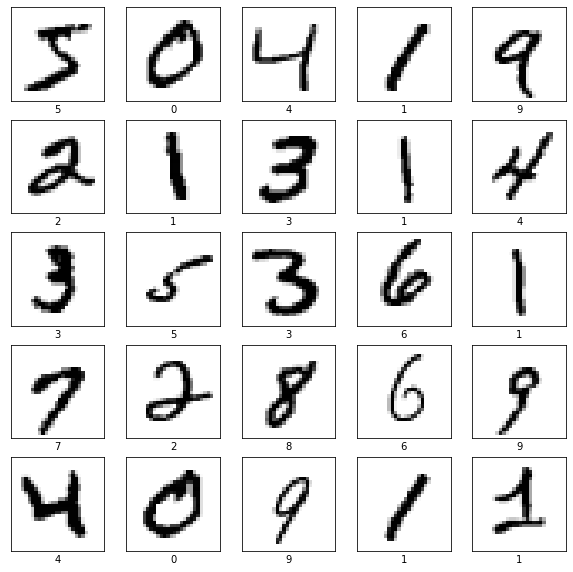

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [8]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.09112265, -0.22991627, -0.19144121,  0.03049756, -0.29458982,
         0.20753491,  0.41132128, -0.09275168, -0.32605398, -0.07146253]],
      dtype=float32)

In [9]:
tf.nn.softmax(predictions).numpy()

array([[0.11183012, 0.08112101, 0.08430297, 0.10525183, 0.07604069,
        0.12563655, 0.15403496, 0.09304717, 0.07368537, 0.09504931]],
      dtype=float32)

In [10]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [11]:
loss_fn(y_train[:1], predictions).numpy()

2.0743623

In [12]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3013 - acc: 0.9131
Epoch 2/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1435 - acc: 0.9577
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1087 - acc: 0.9676
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0867 - acc: 0.9731
Epoch 5/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0721 - acc: 0.9777


In [14]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.0779 - acc: 0.9770


[0.07785152793172746, 0.977]

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.save_weights('./model/hehe')

In [17]:
model_new = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [18]:
model_new.load_weights('./model/hehe')

In [19]:
probability_model = tf.keras.Sequential([
  model_new,
  tf.keras.layers.Softmax()
])

In [20]:
probability_model(x_test[:5])

<tf.Tensor: id=68469, shape=(5, 10), dtype=float32, numpy=
array([[3.6259021e-08, 4.6835988e-09, 1.0225714e-05, 6.6106654e-06,
        1.3156188e-12, 1.3552134e-08, 9.7729826e-18, 9.9998307e-01,
        3.4473246e-08, 4.1676600e-08],
       [5.8671255e-09, 6.9112852e-05, 9.9945301e-01, 4.7737331e-04,
        3.6876804e-17, 4.3214220e-07, 1.2023422e-07, 4.1881453e-13,
        2.7121656e-08, 2.6743411e-13],
       [5.7777930e-07, 9.9942017e-01, 1.2062495e-04, 9.8126739e-06,
        3.6236781e-06, 1.9299318e-06, 1.8554433e-06, 4.2766012e-04,
        1.3676139e-05, 2.0315818e-07],
       [9.9996364e-01, 7.1088635e-10, 1.8298568e-05, 2.9059078e-07,
        5.8021548e-09, 4.4727467e-06, 3.9694537e-06, 7.9627198e-06,
        2.6582192e-09, 1.2757019e-06],
       [3.2908092e-06, 1.7602055e-10, 1.3375061e-06, 3.9065686e-08,
        9.9681807e-01, 1.3739690e-07, 1.3704233e-06, 1.3926033e-04,
        1.9968456e-07, 3.0362695e-03]], dtype=float32)>

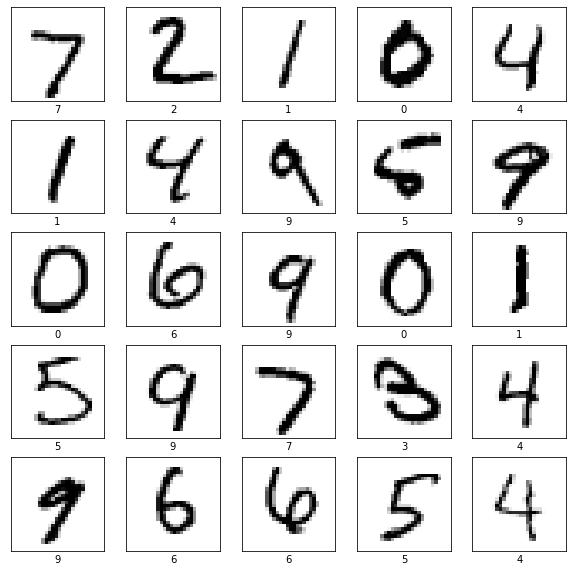

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)


In [23]:
predictions = probability_model.predict(x_test)

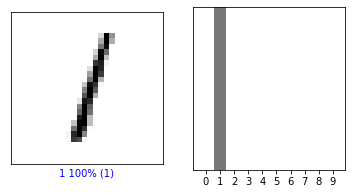

In [24]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

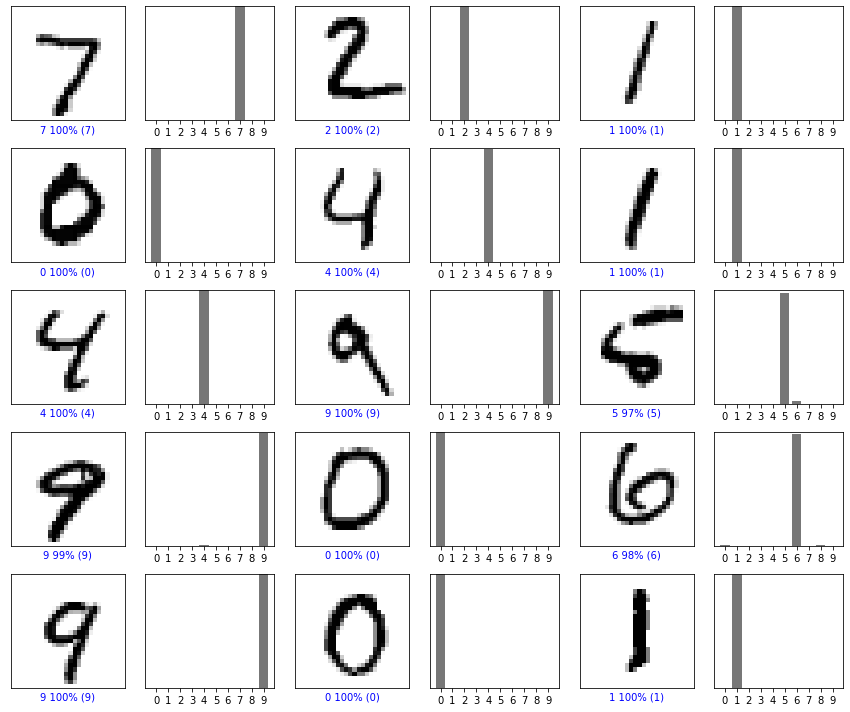

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  y_test)
plt.tight_layout()
plt.show()
